# Exploratory data analysis

In this notebook, we will be conducting some exploratory data analysis for the `built-environment` project.
I don't promise to be comprehensive. I'm just trying to get *something* done, to find a starting point.

In [17]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## Staring at tables from FARS data

Let's start with `accident.csv` from the FARS 2022 National data.
At first, I kept getting a `UnicodeDecodeError` reading `accident.csv` with `pandas`.
Apparently, the error was caused by the format, as described in this [StackOverflow thread](https://archive.today/2025.03.05-154624/https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas).

To fix the error, I first made a copy `accident-copy.csv` so that I didn't alter the raw data.
I opened `accident-copy.csv` in VS Code, clicked the UTF-8 label in the bottom-right corner, then clicked "Save with encoding" and selected UTF-8.
I was then able to properly read the CSV.

In [18]:
accident_df = pd.read_csv("../data/processed/FARS/2022/accident-copy.csv")
accident_df

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
0,1,Alabama,10001,0,0,2,2,0,3,3,...,47,13,1:00pm-1:59pm,4,4,13,1:00pm-1:59pm,47,47,1
1,1,Alabama,10002,0,0,2,2,0,5,5,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,2
2,1,Alabama,10003,0,0,1,1,0,2,2,...,33,1,1:00am-1:59am,50,50,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
3,1,Alabama,10004,0,0,1,1,0,1,1,...,48,15,3:00pm-3:59pm,9,9,15,3:00pm-3:59pm,44,44,1
4,1,Alabama,10005,1,1,1,1,0,1,1,...,48,18,6:00pm-6:59pm,54,54,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39216,56,Wyoming,560114,0,0,2,2,0,2,2,...,30,11,11:00am-11:59am,35,35,12,12:00pm-12:59pm,4,4,1
39217,56,Wyoming,560115,0,0,1,1,0,1,1,...,Unknown if Notified,99,Unknown EMS Scene Arrival Hour,98,Unknown if Arrived,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
39218,56,Wyoming,560116,0,0,1,1,0,1,1,...,2,15,3:00pm-3:59pm,7,7,15,3:00pm-3:59pm,27,27,1
39219,56,Wyoming,560117,0,0,1,1,0,1,1,...,24,7,7:00am-7:59am,40,40,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1


In [19]:
accident_df.describe()

,STATE,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,COUNTY,...,LGT_COND,WEATHER,SCH_BUS,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,FATALS
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,...,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,27.082583,271723.956273,0.243467,0.253283,1.583029,1.542566,0.040463,2.198006,2.188190,91.931669,...,1.990388,6.077484,0.002473,61.309477,69.725887,62.551490,70.653757,77.768262,80.923281,1.083960
std,16.497124,164851.845938,0.617775,0.635309,0.845585,0.803742,0.289577,1.778450,1.774572,98.649798,...,1.251489,18.823399,0.049670,42.875681,36.013495,42.677461,35.776572,32.482569,27.318163,0.347737
min,1.000000,10001.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,12.000000,121850.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,31.000000,...,1.000000,1.000000,0.000000,16.000000,35.000000,16.000000,36.000000,88.000000,88.000000,1.000000
50%,26.000000,260919.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,69.000000,...,2.000000,1.000000,0.000000,99.000000,98.000000,99.000000,99.000000,88.000000,88.000000,1.000000
75%,42.000000,420579.000000,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,3.000000,115.000000,...,3.000000,1.000000,0.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000
max,56.000000,560118.000000,73.000000,73.000000,50.000000,50.000000,10.000000,128.000000,128.000000,999.000000,...,9.000000,99.000000,1.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.000000


There are way too many CSV files for me to investigate in such ashort time, so I'll focus on a few important ones.
By skimming the [FARS Analytical User Manual](https://web.archive.org/web/20250226140538/https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/813556), I was able to determine a few files that seem worthy of attention.
- `accident.csv` describes the crash characteristics and environmental conditions for each crash.
- `person.csv` is important because it describes injury severity.
- `weather.csv` describes atmospheric conditions.
- `vision.csv` describes visibility conditions.
- I don't think I'll look at `drugs.csv` right now, but it might be worth controlling for toxicology.

Let's get some more data. 
- If I run into a `UnicodeDecodeError`, then I will perform the same fix as before.
- Otherwise, I will proceed normally.

In [20]:
person_df = pd.read_csv("../data/raw/FARS/2022/FARS2022NationalCSV/person.csv")
weather_df = pd.read_csv("../data/raw/FARS/2022/FARS2022NationalCSV/weather.csv")
vision_df = pd.read_csv("../data/raw/FARS/2022/FARS2022NationalCSV/vision.csv")
person_df

/var/folders/p6/3_xthzsx7kb28k487fkj956h0000gq/T/ipykernel_63049/1844891244.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  person_df = pd.read_csv("../data/raw/FARS/2022/FARS2022NationalCSV/person.csv")


,STATE,STATENAME,ST_CASE,VEH_NO,PER_NO,VE_FORMS,COUNTY,MONTH,MONTHNAME,DAY,...,IMPACT1,IMPACT1NAME,FIRE_EXP,FIRE_EXPNAME,MAK_MOD,MAK_MODNAME,DEVTYPENAME,DEVMOTORNAME,DEVTYPE,DEVMOTOR
0,1,Alabama,10001,1,1,2,107,1,January,1,...,81.0,Right,0.0,No or Not Reported,2403.0,Jeep / Kaiser-Jeep / Willys- Jeep YJ series/Wr...,NaN,NaN,NaN,NaN
1,1,Alabama,10001,2,1,2,107,1,January,1,...,7.0,7 Clock Point,0.0,No or Not Reported,55402.0,Hyundai Tucson,NaN,NaN,NaN,NaN
2,1,Alabama,10001,2,2,2,107,1,January,1,...,7.0,7 Clock Point,0.0,No or Not Reported,55402.0,Hyundai Tucson,NaN,NaN,NaN,NaN
3,1,Alabama,10002,1,1,2,101,1,January,1,...,12.0,12 Clock Point,0.0,No or Not Reported,55035.0,Hyundai Elantra,NaN,NaN,NaN,NaN
4,1,Alabama,10002,2,1,2,101,1,January,1,...,12.0,12 Clock Point,0.0,No or Not Reported,37402.0,Honda CR-V,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95752,56,Wyoming,560117,1,1,1,19,12,December,22,...,98.0,Not Reported,0.0,No or Not Reported,20403.0,Chevrolet TrailBlazer (2003 on; for 2002 model...,NaN,NaN,NaN,NaN
95753,56,Wyoming,560118,1,1,1,21,12,December,17,...,0.0,Non-Collision,0.0,No or Not Reported,48401.0,Subaru Forester,NaN,NaN,NaN,NaN
95754,56,Wyoming,560118,1,2,1,21,12,December,17,...,0.0,Non-Collision,0.0,No or Not Reported,48401.0,Subaru Forester,NaN,NaN,NaN,NaN
95755,56,Wyoming,560118,1,3,1,21,12,December,17,...,0.0,Non-Collision,0.0,No or Not Reported,48401.0,Subaru Forester,NaN,NaN,NaN,NaN


In [21]:
person_df.describe()

,STATE,ST_CASE,VEH_NO,PER_NO,VE_FORMS,COUNTY,MONTH,DAY,DAYNAME,HOUR,...,RUR_URB,FUNC_SYS,SPEC_USE,EMER_USE,ROLLOVER,IMPACT1,FIRE_EXP,MAK_MOD,DEVTYPE,DEVMOTOR
count,95757.000000,95757.000000,95757.000000,95757.000000,95757.000000,95757.000000,95757.000000,95757.000000,95757.000000,95757.000000,...,95757.000000,95757.000000,86208.000000,86208.000000,86208.000000,86208.000000,86208.000000,86208.000000,9549.000000,9549.000000
mean,26.945811,270385.157022,1.371973,1.519409,1.923358,92.060278,6.716418,15.735309,15.735309,13.485949,...,1.641875,4.253089,0.678951,0.052953,1.106371,18.327174,0.036041,37485.756426,0.781129,0.298775
std,16.539093,165277.348042,1.402415,1.686271,2.084052,98.805162,3.379032,8.839839,8.839839,9.080872,...,0.604264,7.937664,7.783756,0.649239,2.285164,24.620390,0.186393,25897.779903,5.042722,0.823983
min,1.000000,10001.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1398.000000,0.000000,0.000000
25%,12.000000,121562.000000,1.000000,1.000000,1.000000,31.000000,4.000000,8.000000,8.000000,7.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,9.000000,0.000000,14021.000000,0.000000,0.000000
50%,26.000000,260818.000000,1.000000,1.000000,2.000000,69.000000,7.000000,16.000000,16.000000,14.000000,...,2.000000,3.000000,0.000000,0.000000,0.000000,12.000000,0.000000,35047.000000,0.000000,0.000000
75%,42.000000,420588.000000,2.000000,2.000000,2.000000,115.000000,10.000000,23.000000,23.000000,19.000000,...,2.000000,5.000000,0.000000,0.000000,0.000000,12.000000,0.000000,51881.000000,0.000000,0.000000
max,56.000000,560118.000000,50.000000,73.000000,50.000000,999.000000,12.000000,31.000000,31.000000,99.000000,...,9.000000,99.000000,99.000000,9.000000,8.000000,99.000000,1.000000,99999.000000,99.000000,9.000000


In [22]:
weather_df

,STATE,STATENAME,ST_CASE,WEATHER,WEATHERNAME
0,1,Alabama,10001,1,Clear
1,1,Alabama,10002,1,Clear
2,1,Alabama,10003,10,Cloudy
3,1,Alabama,10004,10,Cloudy
4,1,Alabama,10005,2,Rain
...,...,...,...,...,...
39639,56,Wyoming,560114,1,Clear
39640,56,Wyoming,560115,4,Snow
39641,56,Wyoming,560116,4,Snow
39642,56,Wyoming,560117,4,Snow


In [23]:
weather_df.describe()

,STATE,ST_CASE,WEATHER
count,39644.000000,39644.000000,39644.000000
mean,27.092322,271818.715770,6.110054
std,16.503230,164911.054491,18.726794
min,1.000000,10001.000000,1.000000
25%,12.000000,121839.750000,1.000000
50%,26.000000,260955.500000,1.000000
75%,42.000000,420576.250000,2.000000
max,56.000000,560118.000000,99.000000


In [24]:
vision_df

,STATE,STATENAME,ST_CASE,VEH_NO,VISION,VISIONNAME
0,1,Alabama,10001,1,0,No Obstruction Noted
1,1,Alabama,10001,2,0,No Obstruction Noted
2,1,Alabama,10002,1,0,No Obstruction Noted
3,1,Alabama,10002,2,0,No Obstruction Noted
4,1,Alabama,10003,1,0,No Obstruction Noted
...,...,...,...,...,...,...
60537,56,Wyoming,560114,2,0,No Obstruction Noted
60538,56,Wyoming,560115,1,0,No Obstruction Noted
60539,56,Wyoming,560116,1,0,No Obstruction Noted
60540,56,Wyoming,560117,1,0,No Obstruction Noted


In [25]:
vision_df.describe()

,STATE,ST_CASE,VEH_NO,VISION
count,60542.000000,60542.000000,60542.000000,60542.000000
mean,27.101004,271911.507053,1.482970,3.938654
std,16.493580,164828.832015,1.144157,19.089686
min,1.000000,10001.000000,1.000000,0.000000
25%,12.000000,121840.250000,1.000000,0.000000
50%,26.000000,260936.000000,1.000000,0.000000
75%,42.000000,420617.750000,2.000000,0.000000
max,56.000000,560118.000000,50.000000,99.000000


Here are some relevant columns from each CSV.
- `ST_CASE` is the unique ID for each crash. (There are columns with unique identifiers for each vehicle and person involved, but I don't think our project needs this level of detail.)
- Obviously, we're interested in `MONTH`, `DAY`, `HOUR`, and `MINUTE`. (Of course, the year is 2022 for all of this data.)
    - We can also look at `DAY_WEEK` for day-of-the-week. Sunday is 1, Monday is 2, ..., Saturday is 7.
- From `accident.csv`, we have many other relevant columns.
    - We have some columns counting types of people involved in a crash.
        - `PEDS` counts people not in motor vehicles.
        - `PERNOTMVIT` counts non-motorists in transit, e.g. cyclists. 
        - `PERSONS` counts "Person Forms", and `PERMVIT` counts motorists.
    - `VE_TOTAL` counts the number of vehicles involved in a crash.
        - `VE_FORMS` counts vehicles in-transport.
        - `PVH_INVL` counts parked and working vehicles.
    - Global position is recorded with `LATITUDE` and `LONGITUD`.
        - For `LATITUDE`:
            - DD.DDDDDDD = actual decimal degrees
            - 77.7777000 = not reported
            - 88.8888000 = not available
            - 99.9999000 = reported as unknown
        - Similar idea for `LONGITUD`:
            - -DDD.DDDDDDD = actual decimal degrees
            - 777.7777000 = not reported
            - 888.8888000 = not available
            - 999.9999000 = reported as unknown
        - There are also other columns for location, e.g. `COUNTY` and `CITY`. (It's worth caring about `COUNTY` if we're restricting to LA, OC, and SD counties.)
    - `HARM_EV` is a categorical variable describing the first injury- or damage-producing event of the crash.
    - There are some columns that are related to the built environment.
        - `ROUTE` describes route signing, e.g. Interstate, US Highway, State Highway, County Road, Local Street, etc.
        - `RUR_URB` describes land use, e.g. rural vs urban.
        - `FUNC_SYS` describes classification of the segment of the trafficway where the crash occurred, e.g. principal arterial, minor arterial, major collector, minor collector, etc.
        - `RELJCT1` describes whether a crash occurred close to an interchange.
        - `RELJCT2` describes proximity to components, e.g. intersection.
        - `TYP_INT` describes type of intersection.
        - `REL_ROAD` describes relation to trafficway, e.g. roadway, median, shoulder, roadside, etc.
        - `WRK_ZONE` describes whether the first harmful event occurred in a work zone.
    - `LGT_COND` describes the light conditions, e.g. dawn, dusk, etc.
    - `WEATHER` describes atmospheric conditions.
    - There are some columns related to when EMS was called, when EMS arrived, when patients arrived at the hospital, etc. (These columns are relevant as confounding factors for whether or not a crash is fatal. Maybe quick EMS response times saved lives in a really bad crash, vs slow EMS response times caused people to die in a less severe crash.)
    - `FATALS` counts number of fatalities.
- From `person.csv`, the `INJ_SEV` column describes injury severity as categorical data. (Since we will be looking at crash-level data and not vehicle-level or person-level, maybe we should care about the highest injury level seen in the crash, or maybe some kind of average?)
    - 0 = no apparent injury
    - 1 = possible injury
    - 2 = suspected minor injury
    - 3 = suspected serious injury
    - 4 = fatal injury
    - 5 = injured, severity unknown
    - 6 = died prior to crash
    - 9 = unknown/unreported
- `person.csv` also has some columns that could indicate confounding factors, like `REST_USE` (restraint use), `REST_MIS` (restraint misuse), `HELM_USE` (helmet use), `HELM_MIS` (helmet misuse), `DRINKING` (alcohol use), `DRUGS` (toxicology), etc.
- The `WEATHER` column from `weather.csv` obviously describes atmospheric conditions.
    - 1 = clear
    - 2 = rain
    - 3 = sleet or hail
    - 4 = snow
    - 5 = fog, smog, smoke
    - 6 = severe crosswinds
    - 7 = blowing sand, dirt, or soil
    - 8 = other
    - 10 = cloudy
    - 11 = blowing snow
    - 12 = freezing drain or drizzle
    - 98 = not reported
- The `VISION` column from `vision.csv` obviously describes visual obstructions.
    - 0 = no obstruction noted
    - 1 = rain, snow, fog, smoke, sand, dust
    - 2 = reflected glare, bright sunlight, headlights
    - 3 = curve, hill, or other roadway design features
    - 4 = building, billboard, or other structure
    - 5 = trees, crops, vegetation
    - 6 = in-transport motor vehicle
    - 7 = not in-transport motor vehicle
    - 8 = splash or spray of passing vehicle
    - 9 = inadequate defrost or defog system
    - 10 = inadequate vehicle lighting system
    - 11 = obstructing interior to the vehicle
    - 12 = external mirrors
    - 13 = broken or improperly cleaned windshields
    - 14 = obstructing angles on vehicle
    - 95 = no driver present/unknown if driver present
    - 97 = vision obscured, no details
    - 98 = other visual obstruction
    - 99 = reported as unknown

## A little bit of data processing for FARS data

I'd like to process the data a bit.
- I want to focus on crashes occurring only in LA, OC, and SD counties.
    - According to the FARS Analytical User Manual, `COUNTY` uses Geographic Location Codes (GLCs) from the General Services Administration (GSA).
    - From the [GSA website](http://archive.today/2025.03.12-083949/https://www.gsa.gov/reference/geographic-locator-codes), I was able to find the relevant state and county codes.
        - California = 06
        - LA = 037
        - OC = 059
        - SD = 073
- Once I have acquired the unique IDs `ST_CASE` for these counties, I can select relevant columns.
- Next, I'll throw away rows where data is unreported.

In [26]:
accident_df['COUNTY'].dtypes

dtype('int64')

In [27]:
accident_df['COUNTY'].values

array([107, 101, 115, ...,  21,  19,  21], shape=(39221,))

In [28]:
county_codes = [37, 59, 73] # for LA, OC, and SD counties
accident_counties_df = accident_df[(accident_df['STATE'] == 6) & (accident_df['COUNTY'].isin(county_codes))]
accident_counties_df



,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
2757,6,California,60004,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
2762,6,California,60009,0,0,1,1,0,2,2,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
2764,6,California,60011,1,1,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
2770,6,California,60017,0,0,1,1,0,4,4,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
2776,6,California,60023,0,0,1,1,0,3,3,...,43,0,0:00am-0:59am,14,14,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,6,California,64147,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
6850,6,California,64149,0,0,1,1,0,2,2,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
6859,6,California,64158,0,0,2,2,0,3,3,...,49,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,2
6860,6,California,64159,0,0,2,2,0,3,3,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1


Let's keep the following columns from `accident.csv`.
- Unique ID: `ST_CASE`
- Time: `MONTH`, `DAY`, `HOUR`, `MINUTE`, `DAY_WEEK`
- Location: `LATITUDE`, `LONGITUD`, `COUNTY`, `CITY`
- Number of people involved: `PERSONS`, `PERMVIT`, `PERNOTMVIT`, `PEDS`
- Number of vehicles involved: `VE_TOTAL`, `VE_FORMS`, `PVH_INVL`
- Number of fatalities: `FATALS`
- First harmful event: `HARM_EV`
- Conditions: `LGT_COND`, `WEATHER`, `WRK_ZONE`
- Built environment: `ROUTE`, `RUR_URB`, `FUNC_SYS`, `RELJCT1`, `RELJCT2`, `TYP_INT`, `REL_ROAD`
- EMS response: `NOT_HOUR`, `NOT_MIN`, `ARR_HOUR`, `ARR_MIN`, `HOSP_HR`, `HOSP_MN`

In [29]:
relevant_columns = ['ST_CASE',
                    'MONTH', 'DAY', 'HOUR', 'MINUTE', 'DAY_WEEK',
                    'LATITUDE', 'LONGITUD', 'COUNTY', 'CITY',
                    'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'PEDS',
                    'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
                    'FATALS',
                    'HARM_EV',
                    'LGT_COND', 'WEATHER', 'WRK_ZONE',
                    'ROUTE', 'RUR_URB', 'FUNC_SYS', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'REL_ROAD',
                    'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN']
accident_relevant_df = accident_counties_df[relevant_columns]
accident_relevant_df

,ST_CASE,MONTH,DAY,HOUR,MINUTE,DAY_WEEK,LATITUDE,LONGITUD,COUNTY,CITY,...,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN
2757,60004,1,8,11,50,7,33.086403,-117.025567,73,0,...,0,1,1,4,99,99,99,99,99,99
2762,60009,1,6,5,55,5,33.647300,-117.743319,59,1713,...,1,5,1,4,99,99,99,99,99,99
2764,60011,1,6,0,3,5,34.018319,-117.815900,37,1015,...,1,20,1,1,99,99,99,99,88,88
2770,60017,1,25,0,12,3,34.063400,-118.705981,37,0,...,0,1,1,4,99,99,99,99,99,99
2776,60023,1,17,23,35,2,34.208672,-117.676525,37,0,...,0,1,1,4,23,43,0,14,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,64147,12,23,22,18,6,33.811644,-117.831972,59,2560,...,1,19,1,4,22,99,99,99,88,88
6850,64149,12,24,20,32,7,33.716036,-117.844294,59,3420,...,0,1,1,1,20,99,99,99,99,99
6859,64158,11,5,3,48,7,33.555514,-117.673081,59,2199,...,0,1,1,1,3,49,99,99,99,99
6860,64159,12,3,22,40,7,33.930994,-118.317778,37,0,...,0,2,2,1,99,99,99,99,99,99


Let's get rid of rows with unreported/unknown values.

In [30]:
accident_relevant_df.dtypes

ST_CASE         int64
MONTH           int64
DAY             int64
HOUR            int64
MINUTE          int64
DAY_WEEK        int64
LATITUDE      float64
LONGITUD      float64
COUNTY          int64
CITY            int64
PERSONS         int64
PERMVIT         int64
PERNOTMVIT      int64
PEDS            int64
VE_TOTAL        int64
VE_FORMS        int64
PVH_INVL        int64
FATALS          int64
HARM_EV         int64
LGT_COND        int64
WEATHER         int64
WRK_ZONE        int64
ROUTE           int64
RUR_URB         int64
FUNC_SYS        int64
RELJCT1         int64
RELJCT2         int64
TYP_INT         int64
REL_ROAD        int64
NOT_HOUR        int64
NOT_MIN         int64
ARR_HOUR        int64
ARR_MIN         int64
HOSP_HR         int64
HOSP_MN         int64
dtype: object

In [31]:
# Time
valid_month = [x for x in range(1,13)]
valid_day = [x for x in range(1,32)]
valid_day_of_week = [x for x in range(1,8)]
valid_hour = [x for x in range(24)]
valid_min = [x for x in range(60)]

# Location
invalid_latitude = [77.7777000, # not reported
                    88.8888000, # not available (if state exempt)
                    99.9999000  # reported as unknown
                    ]
invalid_longitude = [777.7777000, # not reported
                     888.8888000, # not available (if state exempt)
                     999.9999000  # reported as unknown
                     ]

# Harmful event
invalid_event = 99 # reported as unknown

# Conditions
#invalid_light = [8, # not reported
#                 9  # reported as unknown
#                 ]
#invalid_weather = [98, # not reported
#                   99  # reported as unknown
#                   ]
valid_light = [x for x in range(1,8)]
valid_weather = [x for x in range(1,13)]

# Built environment
#invalid_route = 9 # unknown
valid_route = [x for x in range(1,9)]
valid_land_use = [1, # rural
                  2  # urban
                  ]
valid_function = [x for x in range(1,8)]
valid_reljct1 = [0, # not within interchange area
                 1  # within interchange area
                 ]
valid_reljct2 = [x for x in range(1,9)]
valid_reljct2.extend([x for x in range(16,21)])
valid_intersection = [x for x in range(1,12)]
valid_road = [x for x in range(1,9)]
valid_road.extend([x for x in range(10,13)])

accident_processed_df = accident_relevant_df[(accident_relevant_df['MONTH'].isin(valid_month))
                                             & (accident_relevant_df['DAY'].isin(valid_day))
                                             & (accident_relevant_df['DAY_WEEK'].isin(valid_day_of_week))
                                             & (accident_relevant_df['HOUR'].isin(valid_hour))
                                             & (accident_relevant_df['MINUTE'].isin(valid_min))
                                             & (~accident_relevant_df['LATITUDE'].isin(invalid_latitude))
                                             & (~accident_relevant_df['LONGITUD'].isin(invalid_longitude))
                                             & (accident_relevant_df['HARM_EV'] != invalid_event)
                                             & (accident_relevant_df['LGT_COND'].isin(valid_light))
                                             & (accident_relevant_df['WEATHER'].isin(valid_weather))
                                             & (accident_relevant_df['ROUTE'].isin(valid_route))
                                             & (accident_relevant_df['RUR_URB'].isin(valid_land_use))
                                             & (accident_relevant_df['FUNC_SYS'].isin(valid_function))
                                             & (accident_relevant_df['RELJCT1'].isin(valid_reljct1))
                                             & (accident_relevant_df['RELJCT2'].isin(valid_reljct2))
                                             & (accident_relevant_df['TYP_INT'].isin(valid_intersection))
                                             & (accident_relevant_df['REL_ROAD'].isin(valid_road))
                                             ]

accident_processed_df

,ST_CASE,MONTH,DAY,HOUR,MINUTE,DAY_WEEK,LATITUDE,LONGITUD,COUNTY,CITY,...,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN
2757,60004,1,8,11,50,7,33.086403,-117.025567,73,0,...,0,1,1,4,99,99,99,99,99,99
2762,60009,1,6,5,55,5,33.647300,-117.743319,59,1713,...,1,5,1,4,99,99,99,99,99,99
2764,60011,1,6,0,3,5,34.018319,-117.815900,37,1015,...,1,20,1,1,99,99,99,99,88,88
2770,60017,1,25,0,12,3,34.063400,-118.705981,37,0,...,0,1,1,4,99,99,99,99,99,99
2776,60023,1,17,23,35,2,34.208672,-117.676525,37,0,...,0,1,1,4,23,43,0,14,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845,64144,12,16,9,59,6,33.766575,-117.981114,59,4130,...,0,2,2,1,99,99,99,99,99,99
6848,64147,12,23,22,18,6,33.811644,-117.831972,59,2560,...,1,19,1,4,22,99,99,99,88,88
6850,64149,12,24,20,32,7,33.716036,-117.844294,59,3420,...,0,1,1,1,20,99,99,99,99,99
6859,64158,11,5,3,48,7,33.555514,-117.673081,59,2199,...,0,1,1,1,3,49,99,99,99,99


Okay, at this point, we have a little over 1000 unique crashes.

I'd like to add a few more columns.
- `INJ_SEV` from `person.csv`
- `VISION` from `vision.csv`

(I'll do this later. For now, I'd like to move onto descriptive statistics.)

## Descriptive statistics for the FARS data

Before working on any visualizations, maybe it'd be worth printing out some descriptive statistics.

In [32]:
accident_processed_df.info

<bound method DataFrame.info of       ST_CASE  MONTH  DAY  HOUR  MINUTE  DAY_WEEK   LATITUDE    LONGITUD  \
2757    60004      1    8    11      50         7  33.086403 -117.025567   
2762    60009      1    6     5      55         5  33.647300 -117.743319   
2764    60011      1    6     0       3         5  34.018319 -117.815900   
2770    60017      1   25     0      12         3  34.063400 -118.705981   
2776    60023      1   17    23      35         2  34.208672 -117.676525   
...       ...    ...  ...   ...     ...       ...        ...         ...   
6845    64144     12   16     9      59         6  33.766575 -117.981114   
6848    64147     12   23    22      18         6  33.811644 -117.831972   
6850    64149     12   24    20      32         7  33.716036 -117.844294   
6859    64158     11    5     3      48         7  33.555514 -117.673081   
6862    64161     11   24     3      20         5  33.778858 -117.884986   

      COUNTY  CITY  ...  RELJCT1  RELJCT2  TYP_INT  REL

### Time

For time, we might want to know which months, hours, and days of the week have the most crashes.

In [33]:
accident_processed_df.value_counts('MONTH')

MONTH
10    104
5      96
9      95
4      93
8      93
11     91
1      87
3      87
6      85
7      81
2      78
12     77
Name: count, dtype: int64

The worst month (October) has about $104/77 \approx 1.35$ times as many crashes as the safest month (December).

In [34]:
accident_processed_df.value_counts('HOUR')

HOUR
2     81
21    74
20    74
0     73
22    71
18    64
1     54
23    54
19    47
4     45
5     41
3     38
15    37
6     37
16    36
17    33
8     31
7     29
12    29
11    27
9     25
10    24
13    22
14    21
Name: count, dtype: int64

Wow, the worse time (02:00) has about $81/21 \approx 3.86$ times as many crashes as the safest time (14:00).
It seems like the most dangerous times are at night, and the safest times are in the morning and early afternoon.

In [35]:
accident_processed_df.value_counts('DAY_WEEK')

DAY_WEEK
1    194
7    193
6    160
5    147
3    140
2    130
4    103
Name: count, dtype: int64

The worst day (Sunday) is has $194/103 \approx 1.88%$ times as many crashes as the safest day (Wednesday).
The most dangerous days are on the weekends.

We can also cut up the data a bit.

In [36]:
accident_processed_df.value_counts(['MONTH', 'HOUR'])

MONTH  HOUR
7      2       13
6      21      11
5      21      11
10     19      11
       20      11
               ..
5      13       1
       10       1
11     8        1
       14       1
4      11       1
Name: count, Length: 275, dtype: int64

In [37]:
accident_processed_df.value_counts(['MONTH', 'DAY_WEEK'])

MONTH  DAY_WEEK
6      7           26
10     1           23
5      3           22
8      1           21
5      7           20
                   ..
2      4            6
3      4            6
12     2            5
       4            5
7      4            5
Name: count, Length: 84, dtype: int64

Not sure how helpful that was.

Anyways, let's visualize some of the time data.

<Axes: xlabel='MONTH', ylabel='count'>

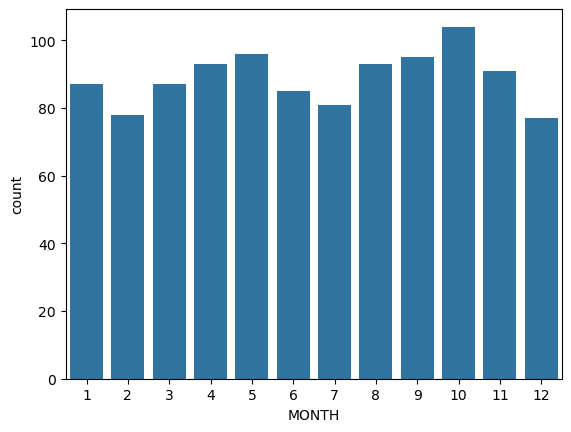

In [38]:
sns.countplot(accident_processed_df, x='MONTH')

<Axes: xlabel='MONTH', ylabel='PERSONS'>

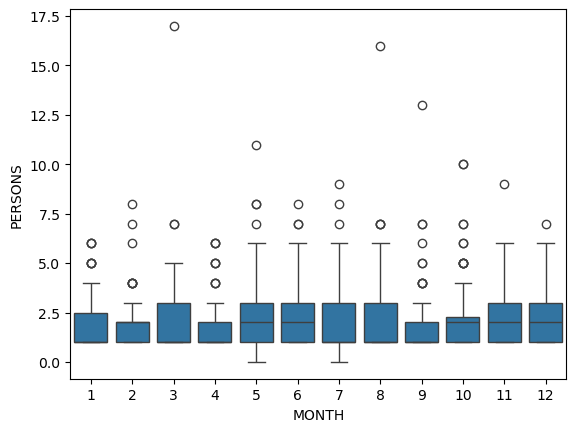

In [39]:
sns.boxplot(accident_processed_df, x='MONTH', y='PERSONS')

<Axes: xlabel='MONTH', ylabel='FATALS'>

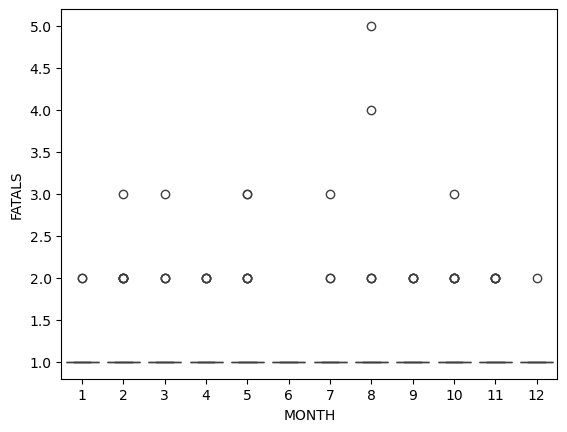

In [40]:
sns.boxplot(accident_processed_df, x='MONTH', y='FATALS')

<Axes: xlabel='MONTH', ylabel='VE_TOTAL'>

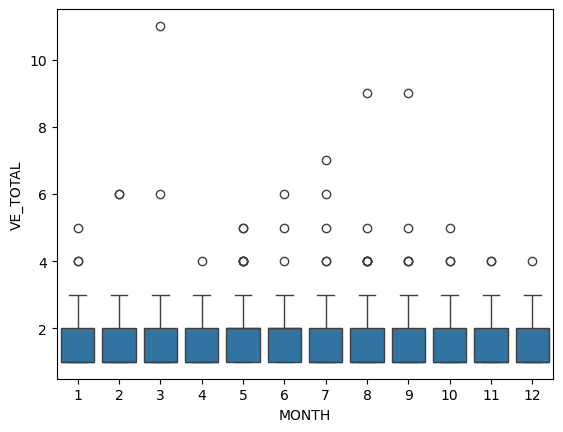

In [41]:
sns.boxplot(accident_processed_df, x='MONTH', y='VE_TOTAL')

In [42]:
#sns.countplot(accident_processed_df, x='MONTH', hue='FATALS')

In [43]:
#sns.countplot(accident_processed_df, x='MONTH', hue='PERSONS')

<Axes: xlabel='HOUR', ylabel='count'>

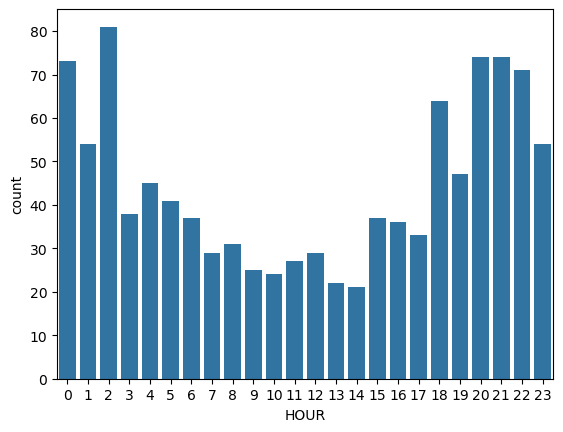

In [44]:
sns.countplot(accident_processed_df, x='HOUR')

<Axes: xlabel='HOUR', ylabel='PERSONS'>

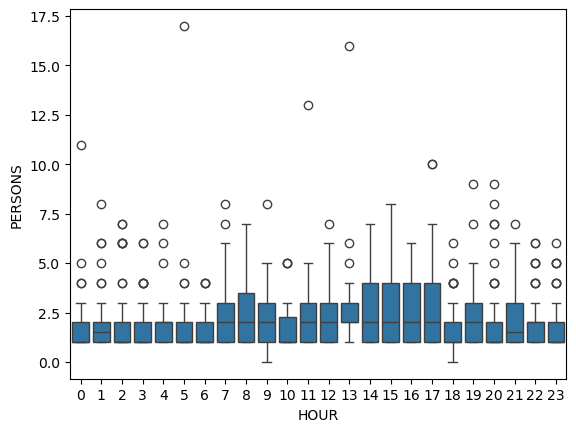

In [45]:
sns.boxplot(accident_processed_df, x='HOUR', y='PERSONS')

<Axes: xlabel='HOUR', ylabel='FATALS'>

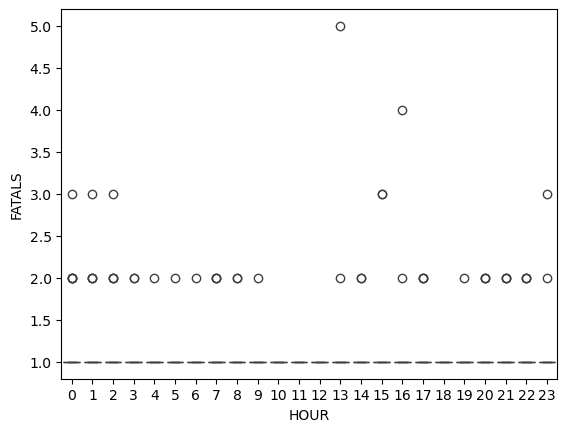

In [46]:
sns.boxplot(accident_processed_df, x='HOUR', y='FATALS')

<Axes: xlabel='HOUR', ylabel='VE_TOTAL'>

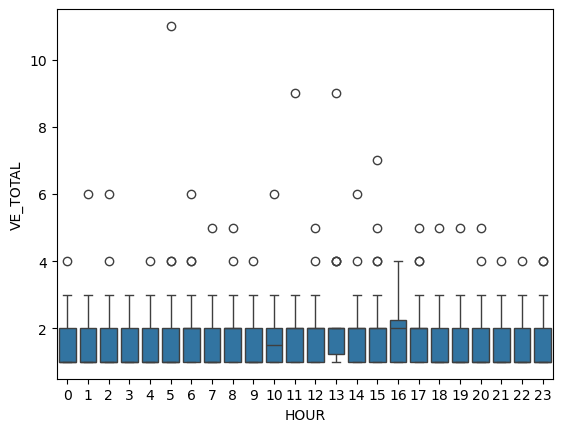

In [47]:
sns.boxplot(accident_processed_df, x='HOUR', y='VE_TOTAL')

In [48]:
#sns.countplot(accident_processed_df, x='HOUR', hue='FATALS')

In [49]:
#sns.countplot(accident_processed_df, x='MONTH', hue='PERSONS')

<Axes: xlabel='DAY_WEEK', ylabel='count'>

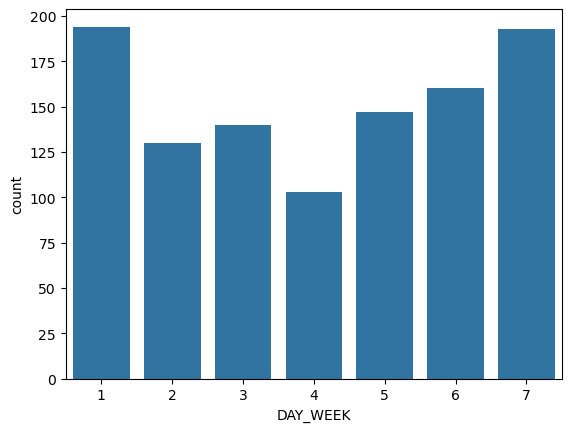

In [50]:
sns.countplot(accident_processed_df, x='DAY_WEEK')

<Axes: xlabel='DAY_WEEK', ylabel='PERSONS'>

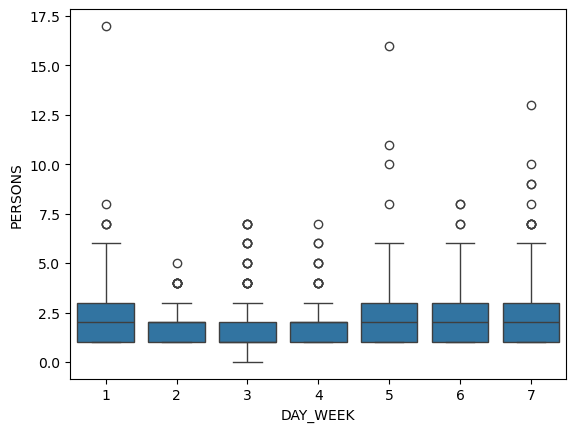

In [51]:
sns.boxplot(accident_processed_df, x='DAY_WEEK', y='PERSONS')

<Axes: xlabel='DAY_WEEK', ylabel='FATALS'>

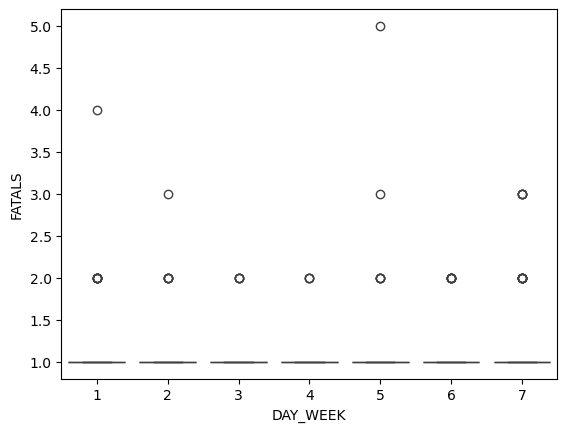

In [52]:
sns.boxplot(accident_processed_df, x='DAY_WEEK', y='FATALS')

<Axes: xlabel='DAY_WEEK', ylabel='VE_TOTAL'>

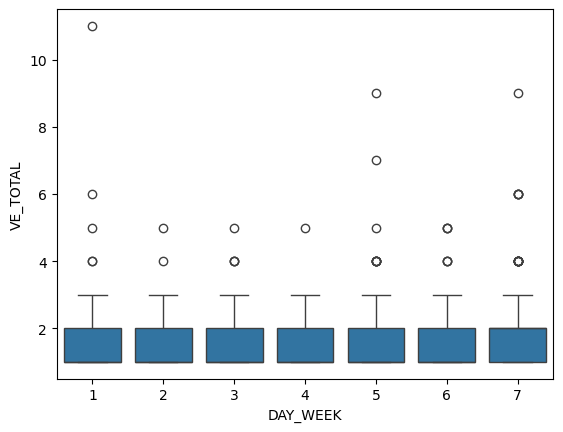

In [53]:
sns.boxplot(accident_processed_df, x='DAY_WEEK', y='VE_TOTAL')

In [54]:
#sns.countplot(accident_processed_df, x='DAY_WEEK', hue='FATALS')

In [55]:
#sns.countplot(accident_processed_df, x='DAY_WEEK', hue='PERSONS')

### Persons

We might also want to know descriptive statistics for people involved in crashes.

In [56]:
accident_processed_df[['PERSONS', 'PERMVIT', 'PERNOTMVIT', 'PEDS']].describe()

,PERSONS,PERMVIT,PERNOTMVIT,PEDS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,2.127460,2.106842,0.473290,0.452671
std,1.691682,1.688117,0.582732,0.551614
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000
75%,3.000000,3.000000,1.000000,1.000000
max,17.000000,17.000000,5.000000,3.000000


In [57]:
accident_processed_df[['PERSONS', 'PERMVIT', 'PERNOTMVIT', 'PEDS']].median()

PERSONS       2.0
PERMVIT       2.0
PERNOTMVIT    0.0
PEDS          0.0
dtype: float64

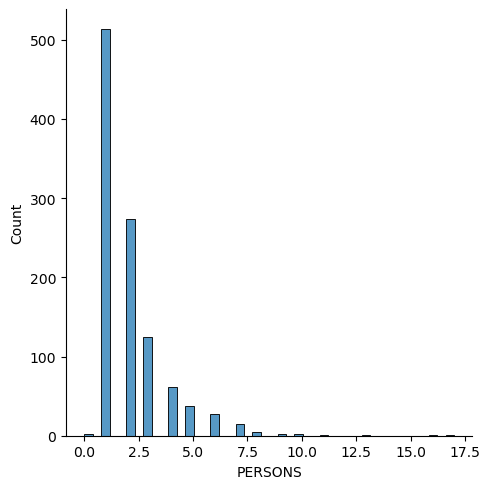

In [58]:
sns.displot(accident_processed_df, x='PERSONS')

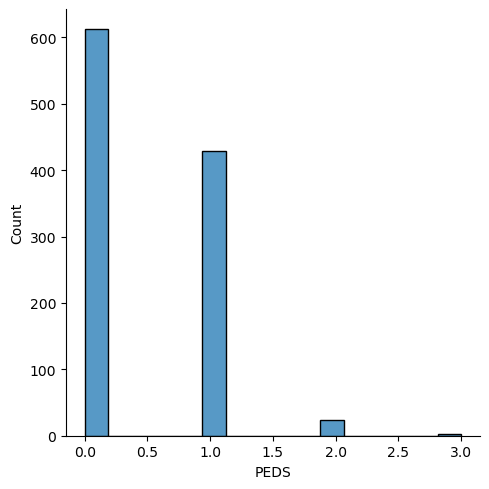

In [59]:
sns.displot(accident_processed_df, x='PEDS')

Typically, 2 people are injured per crash, and these people are typically occupants of motor vehicles in transit.

Dang though, looks like there was a crash involving 17 people.

In [60]:
accident_processed_df['FATALS'].describe()

count    1067.000000
mean        1.054358
std         0.282124
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: FATALS, dtype: float64

In [61]:
accident_processed_df['FATALS'].median()

np.float64(1.0)

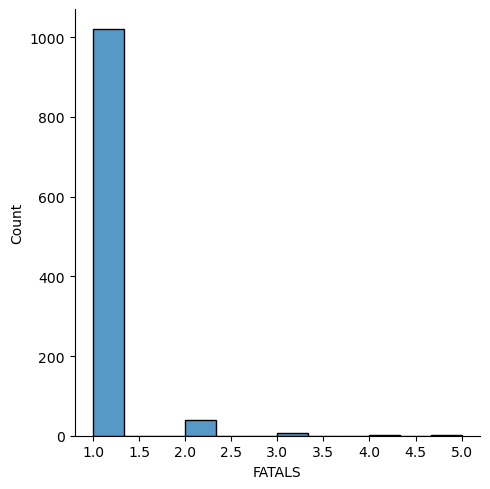

In [62]:
sns.displot(accident_processed_df, x='FATALS')

Typically, a crash involves 1 fatality. However, there was a crash with 5 fatalities in 2022.

I'm not sure if I'm reading the data wrong, but something looks off.
- `PERSONS` has a minimum of 0, meaning there has been a crash involving zero people.
- `FATALS` has a minimum of 1, meaning the minimum number of fatalities per crash is 1.
- It's impossible for both of those things to be true simultaneously...

### Vehicles

How about the number of vehicles involved per crash?

In [63]:
accident_processed_df[['VE_TOTAL', 'VE_FORMS', 'PVH_INVL']].describe()

,VE_TOTAL,VE_FORMS,PVH_INVL
count,1067.000000,1067.000000,1067.000000
mean,1.614808,1.516401,0.098407
std,0.951293,0.852357,0.446655
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000
max,11.000000,11.000000,5.000000


In [64]:
accident_processed_df[['VE_TOTAL', 'VE_FORMS', 'PVH_INVL']].median()

VE_TOTAL    1.0
VE_FORMS    1.0
PVH_INVL    0.0
dtype: float64

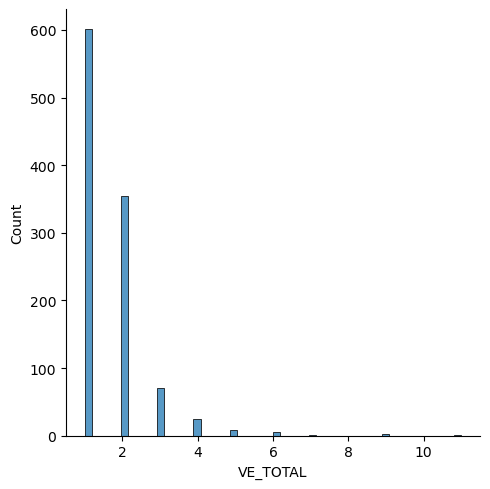

In [65]:
sns.displot(accident_processed_df, x='VE_TOTAL')

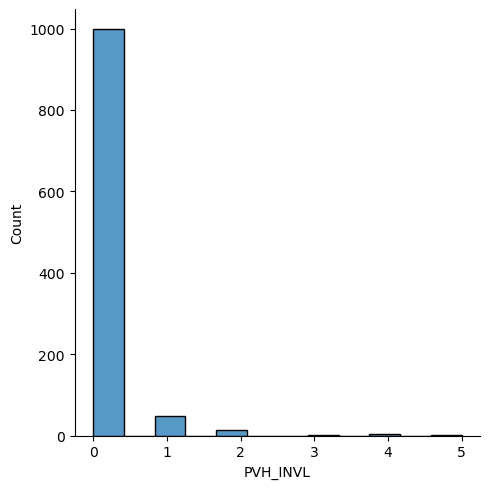

In [66]:
sns.displot(accident_processed_df, x='PVH_INVL')

Looking at these descriptive statistics, we notice a few things.
- Naturally, at least one vehicle is involved per crash. 
- Thankfully, the typical number of vehicles involved per crash is 1.
- Typically, 0 parked vehicles are involved per crash.
- There has been a crash involving as many as 11 vehicles, and a crash involving as many as 5 parked vehicles.

### Harmful events

What harmful events are the most common causes of crashes?

In [67]:
accident_processed_df.value_counts('HARM_EV')

HARM_EV
8     352
12    318
33    106
9      45
1      34
14     30
42     23
25     23
15     22
24     19
35     10
39     10
30      9
5       8
59      8
43      7
52      5
41      4
18      4
7       4
38      4
46      3
31      3
20      2
54      2
58      2
17      2
40      1
32      1
2       1
23      1
21      1
72      1
73      1
74      1
Name: count, dtype: int64

<Axes: xlabel='HARM_EV', ylabel='count'>

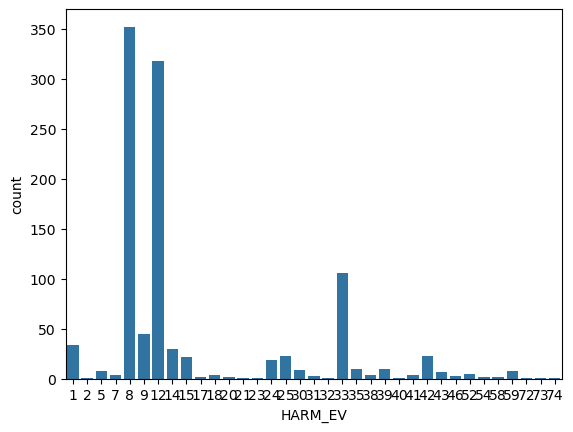

In [68]:
sns.countplot(accident_processed_df, x='HARM_EV')

The top 3 causes account for $776/1067 \approx 72.7\%$ of crashes.
1. Pedestrian (8), accounting for $352/1067 \approx 33.0\%$ of crashes
2. Motor vehicle in-transport (12), accounting for $318/1067 \approx 29.8\%$ of crashes
3. Curb (3), accounting for $106/1067 \approx 9.93\%$ of crashes

### Conditions

Now let's look at environmental conditions.

In [69]:
accident_processed_df.value_counts('LGT_COND')

LGT_COND
3    474
1    346
2    196
5     21
4     19
6     11
Name: count, dtype: int64

<Axes: xlabel='LGT_COND', ylabel='count'>

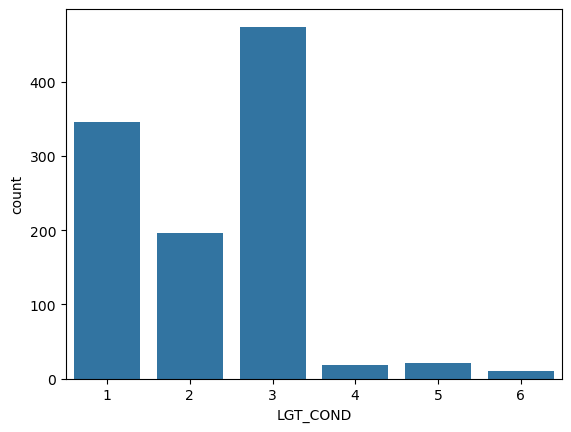

In [70]:
sns.countplot(accident_processed_df, x='LGT_COND')

The top 3 light conditions account for $1016/1067 \approx 95.2\%$ of crashes.
1. Dark - Lighted (3), accounting for $474/1067 \approx 44.4\%$ of crashes
2. Daylight (1), accounting for $346/1067 \approx 32.4\%$ of crashes
3. Dark - Not Lighted (2), accounting for $196/1067 \approx 18.4\%$ of crashes

If I were to guess, not too many people drive at Dawn (4) or Dusk (5), and the lighting condition is usually reported, so most people wouldn't be categorized under Dark - Unknown Lighting (6).

In [71]:
accident_processed_df.value_counts('WEATHER')

WEATHER
1     932
10    102
2      26
5       4
6       1
8       1
12      1
Name: count, dtype: int64

<Axes: xlabel='WEATHER', ylabel='count'>

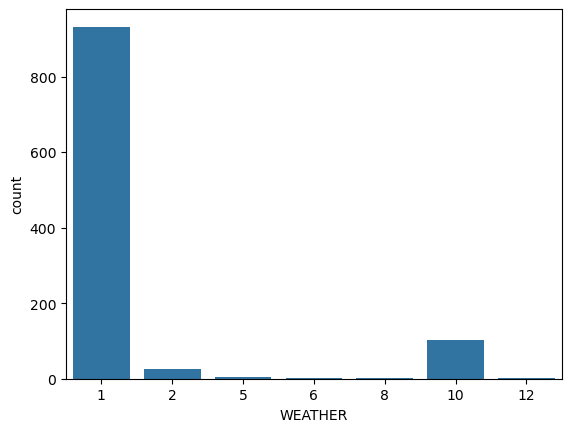

In [72]:
sns.countplot(accident_processed_df, x='WEATHER')

The vast majority ($932/1067 \approx 87.3\%$) of crashes occur under Clear (1) conditions, simply because those are the usual conditions in LA/OC/SD counties.

Cloudy (10) accounts for $102/1067 \approx 9.56\%$ of crashes, while Rain (2) accounts for $26/1067 \approx 2.44\%$.

In [73]:
accident_processed_df.value_counts('WRK_ZONE')

WRK_ZONE
0    1038
4      17
1       9
2       3
Name: count, dtype: int64

<Axes: xlabel='WRK_ZONE', ylabel='count'>

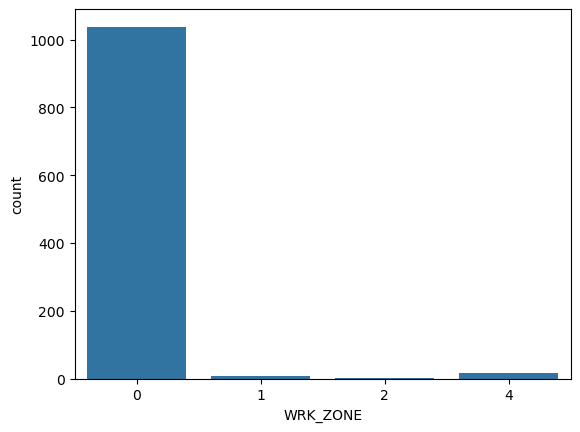

In [74]:
sns.countplot(accident_processed_df, x='WRK_ZONE')

Work zones are uncommon, so it makes sense that most accidents occur outside of work zones. We can probably ignore work zones.

### Built environment

Let's examine the built environment.


In [75]:
accident_processed_df.value_counts('ROUTE')

ROUTE
8    575
1    245
3    205
2     17
4     15
6     10
Name: count, dtype: int64

<Axes: xlabel='ROUTE', ylabel='count'>

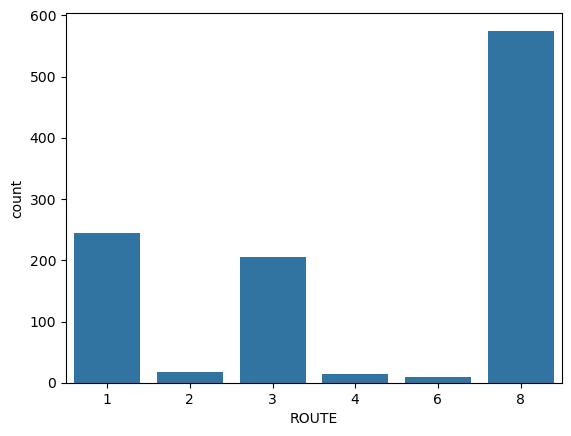

In [76]:
sns.countplot(accident_processed_df, x='ROUTE')

The top 3 route signings account for $1025/1067 \approx 96.1\%$ of crashes.
1. Other (8), accounting for $575/1067 \approx 53.9\%$ of crashes
2. Interstate (1), accounting for $245/1067 \approx 23.0\%$ of crashes
3. State Highway (3), accounting for $205/1067 \approx 19.2\%$ of crashes

Not sure what the "Other" category really entails.

In [77]:
accident_processed_df.value_counts('RUR_URB')

RUR_URB
2    984
1     83
Name: count, dtype: int64

<Axes: xlabel='RUR_URB', ylabel='count'>

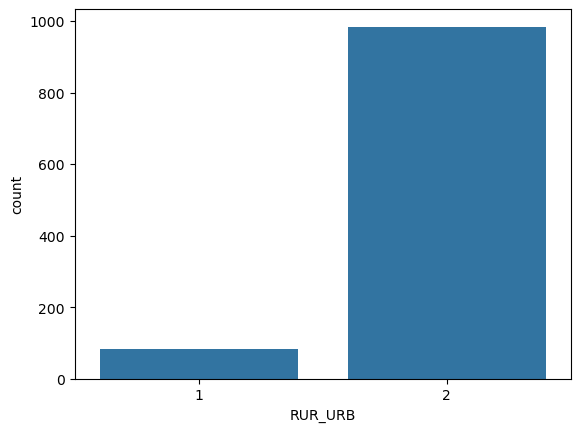

In [78]:
sns.countplot(accident_processed_df, x='RUR_URB')

It makes sense that most accidents occur in urban areas, since that's where most people live.

In [79]:
accident_processed_df.value_counts('FUNC_SYS')

FUNC_SYS
3    370
1    239
4    204
2    127
5     74
7     48
6      5
Name: count, dtype: int64

<Axes: xlabel='FUNC_SYS', ylabel='count'>

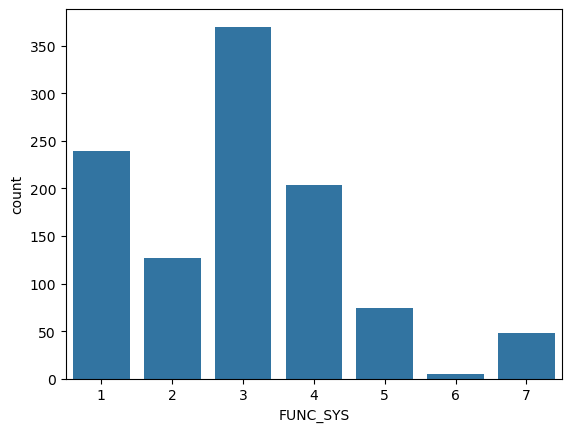

In [80]:
sns.countplot(accident_processed_df, x='FUNC_SYS')

In order:
1. Principal Arterial - Other (3), accounting for $370/1067 \approx 34.7\%$ of crashes
2. Interstate (1), accounting for $239/1067 \approx 22.4\%$ of crashes
3. Minor Arterial (4), accounting for $204/1067 \approx 19.1\%$ of crashes
4. Principal Arterial - Other Freeways and Expressways (2), accounting for $127/1067 \approx 11.9\%$ of crashes
5. Major Collector (5), accounting for $74/1067 \approx 6.94\%$ of crashes
6. Local (7), accounting for $48/1067 \approx 4.50\%$ of crashes
7. Minor Collector (6), accounting for $5/1067 \approx 0.469\%$ of crashes

For definitions of these terms, see the [Highway Functional Classification Concepts, Criteria, and Procedures](https://web.archive.org/web/20250301002527/https://epa-sdcc.ornl.gov/documents/2023_FHWA_Functional_Classification_Guidelines.pdf) by the Federal Highway Administration (FHWA).

It might be worth looking at [Motor Vehicle Fatalities, Vehicle-Miles, and Associated Rates by Highway Functional System](https://web.archive.org/web/20250222134436/https://www.bts.gov/content/motor-vehicle-fatalities-vehicle-miles-and-associated-rates-highway-functional-system) from the Bureau of Transportation Statistics (BTS).

In [81]:
accident_processed_df.value_counts('RELJCT1')

RELJCT1
0    905
1    162
Name: count, dtype: int64

<Axes: xlabel='RELJCT1', ylabel='count'>

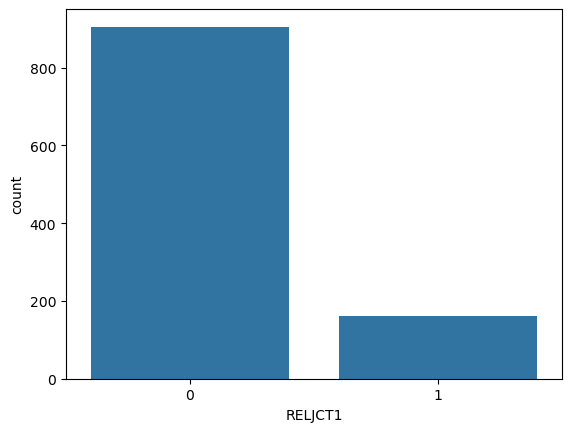

In [82]:
sns.countplot(accident_processed_df, x='RELJCT1')

Evidently, most accidents do not occur within an interchange area.

In [83]:
accident_processed_df.value_counts('RELJCT2')

RELJCT2
1     586
3     162
2     137
18     62
5      46
19     25
20     22
8      21
6       3
4       1
7       1
16      1
Name: count, dtype: int64

<Axes: xlabel='RELJCT2', ylabel='count'>

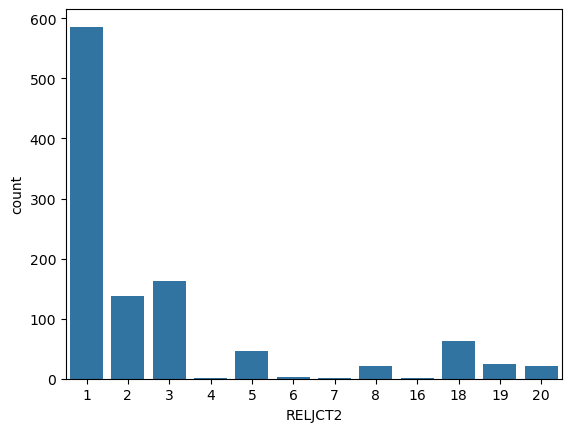

In [84]:
sns.countplot(accident_processed_df, x='RELJCT2')

The top 3 junction types account for $885/1067 \approx 82.9\%$ of crashes.
1. Non-Junction (1), accounting for $586/1067 \approx 54.9\%$ of crashes
2. Intersection-Related (3), accounting for $162/1067 \approx 15.2\%$ of crashes
3. Intersection (2), accounting for $137/1067 \approx 12.8\%$ of crashes

In [85]:
accident_processed_df.value_counts('TYP_INT')

TYP_INT
1    768
2    203
3     93
4      3
Name: count, dtype: int64

<Axes: xlabel='TYP_INT', ylabel='count'>

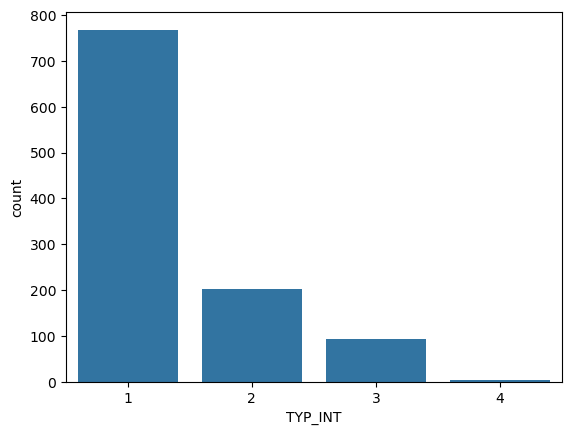

In [86]:
sns.countplot(accident_processed_df, x='TYP_INT')

The top 3 intersections for accidents account for $1064/1067 \approx 99.7\%$ of crashes.
1. Not an Intersection (1), accounting for $768/1067 \approx 72.0\%$ of crashes
2. Four-Way Intersection (2), accounting for $203/1067 \approx 19.0\%$ of crashes
3. T-Intersection (3), accounting for $93/1067 \approx 8.72\%$ of crashes
4. Y-Intersection (4), accounting for $5/1067 \approx 0.469\%$ of crashes

Notably, there are zero crashes at Traffic Circles, Roundabouts, Five-Point (or More), L-Intersection, etc.

In [87]:
accident_processed_df.value_counts('REL_ROAD')

REL_ROAD
1     769
4     216
3      39
2      18
7      14
8       8
5       1
11      1
12      1
Name: count, dtype: int64

<Axes: xlabel='REL_ROAD', ylabel='count'>

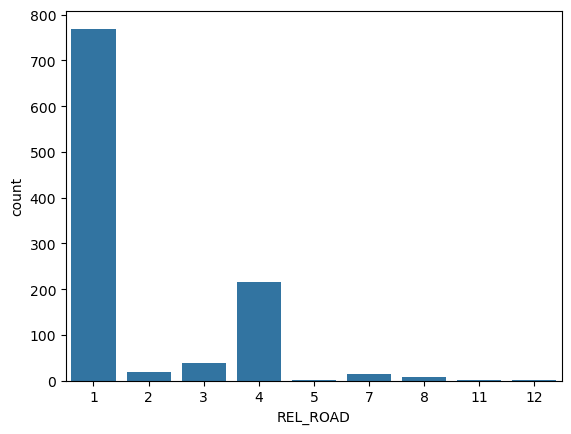

In [88]:
sns.countplot(accident_processed_df, x='REL_ROAD')

The top 2 positions in the roadway account for $985/1067 \approx 92.3\%$ of crashes.
1. On Roadway (1), accounting for $769/1067 \approx 72.1\%$ of crashes
2. On Roadside (4), accounting for $216/1067 \approx 20.2\%$ of crashes


## Visualizations

Let's try some more visualizations.

Let's focus on a few variables.
- Circular: `MONTH`, `HOUR`, `DAY_WEEK`
- Numerical: `PERSONS`, `PEDS`, `VE_TOTAL`, `PVH_INVL`, `FATALS`
- Nominal: `HARM_EV`, `LGT_COND`, `WEATHER`, `ROUTE`, `RUR_URB`, `FUNC_SYS`, `RELJCT1`, `RELJCT2`, `TYP_INT`, `REL_ROAD`


In [89]:
relevant_circular_vars = ['MONTH', 'HOUR', 'DAY_WEEK']
relevant_numerical_vars = ['PERSONS', 'PEDS', 'VE_TOTAL', 'PVH_INVL', 'FATALS']
relevant_nominal_vars = ['HARM_EV', 'LGT_COND', 'WEATHER', 'ROUTE', 'RUR_URB', 'FUNC_SYS', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'REL_ROAD']
all_vars = [*relevant_circular_vars, *relevant_numerical_vars, *relevant_nominal_vars]

Let's graph the variables pairwise.

<bound method Grid.add_legend of <seaborn.axisgrid.PairGrid object at 0x439f84ef0>>

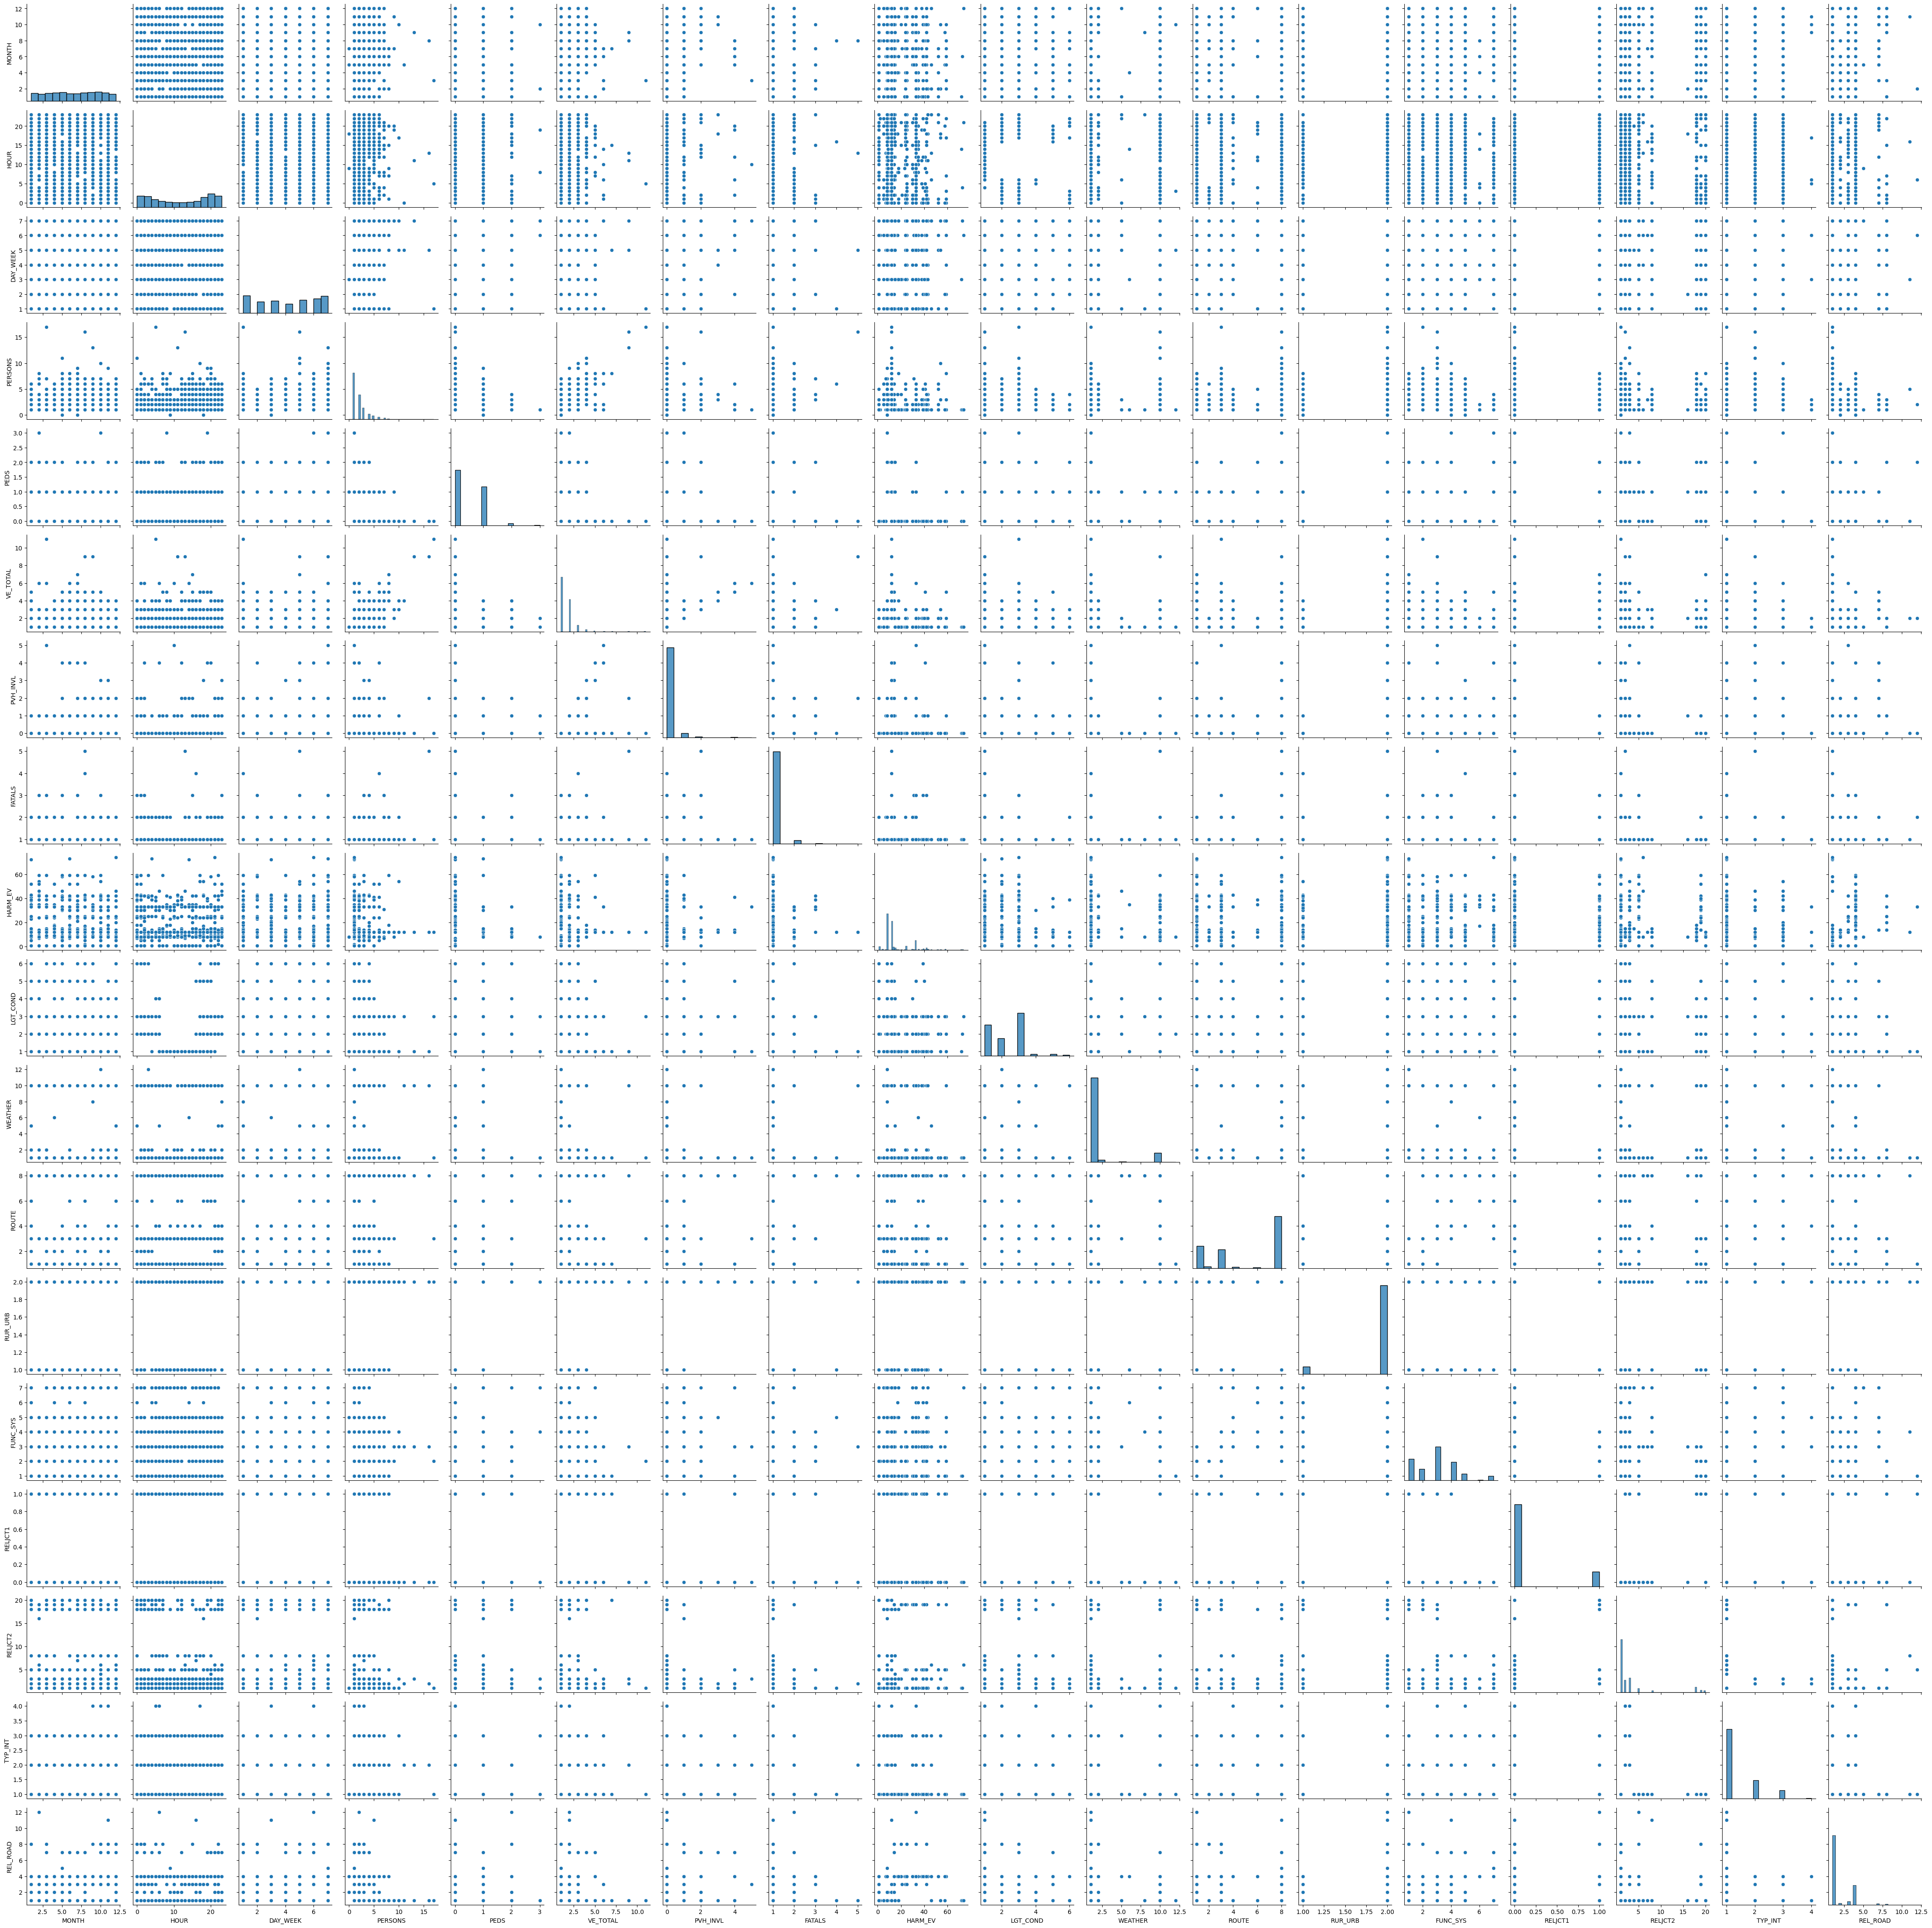

In [90]:
g = sns.PairGrid(accident_processed_df, vars = all_vars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend

Uhhh...not sure how helpful that was.

# Investigating EPA data with GeoPandas

I will be using GeoPandas to look through the EPA data.

In [91]:
import geopandas

In [92]:
smart_location_df = geopandas.read_file("../data/raw/EPA/SmartLocationDatabaseV3/SmartLocationDatabase.gdb")
smart_location_df

,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,...,VMT_per_worker,VMT_tot_min,VMT_tot_max,VMT_tot_avg,GHG_per_worker,Annual_GHG,SLC_score,Shape_Length,Shape_Area,geometry
0,481130078254,481130078254,48,113,007825,4,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,27.496405,11.442995,82.636303,25.659327,24.499297,6369.817221,77.450956,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
1,481130078252,481130078252,48,113,007825,2,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,26.465754,11.442995,82.636303,25.659327,23.580987,6131.056669,78.898635,3519.469110,4.849451e+05,"MULTIPOLYGON (((-68891.713 1090955.557, -68860..."
2,481130078253,481130078253,48,113,007825,3,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,32.311348,11.442995,82.636303,25.659327,28.789412,7485.246991,70.687759,1697.091802,1.067059e+05,"MULTIPOLYGON (((-68078.32 1091181.799, -68077...."
3,481130078241,481130078241,48,113,007824,1,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,26.277851,11.442995,82.636303,25.659327,23.413565,6087.527012,79.162569,2922.609204,4.818284e+05,"MULTIPOLYGON (((-68978.261 1090638.77, -68976...."
4,481130078242,481130078242,48,113,007824,2,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,30.138550,11.442995,82.636303,25.659327,26.853448,6981.896477,73.739730,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220734,780309610002,780309610002,78,030,961000,2,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3414.446949,3.355857e+05,"MULTIPOLYGON (((3348221.553 50116.644, 3348228..."
220735,780309610003,780309610003,78,030,961000,3,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2421.025608,2.924305e+05,"MULTIPOLYGON (((3348813.708 51185.14, 3348818...."
220736,780309610005,780309610005,78,030,961000,5,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.909418,1.619395e+05,"MULTIPOLYGON (((3348457.913 51255.64, 3348596...."
220737,780309607003,780309607003,78,030,960700,3,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16896.768872,1.038966e+07,"MULTIPOLYGON (((3363559.988 50371.461, 3363564..."


In [93]:
smart_location_df.info

<bound method DataFrame.info of              GEOID10       GEOID20 STATEFP COUNTYFP TRACTCE BLKGRPCE   CSA  \
0       481130078254  481130078254      48      113  007825        4   206   
1       481130078252  481130078252      48      113  007825        2   206   
2       481130078253  481130078253      48      113  007825        3   206   
3       481130078241  481130078241      48      113  007824        1   206   
4       481130078242  481130078242      48      113  007824        2   206   
...              ...           ...     ...      ...     ...      ...   ...   
220734  780309610002  780309610002      78      030  961000        2  None   
220735  780309610003  780309610003      78      030  961000        3  None   
220736  780309610005  780309610005      78      030  961000        5  None   
220737  780309607003  780309607003      78      030  960700        3  None   
220738  780309602002  780309602002      78      030  960200        2  None   

                        CSA_Nam

In [94]:
smart_location_df.dtypes

GEOID10           object
GEOID20           object
STATEFP           object
COUNTYFP          object
TRACTCE           object
                  ...   
Annual_GHG       float64
SLC_score        float64
Shape_Length     float64
Shape_Area       float64
geometry        geometry
Length: 182, dtype: object

The [Technical Documentation and User Guide](https://web.archive.org/web/20250317025004/https://www.epa.gov/system/files/documents/2023-10/epa_sld_3.0_technicaldocumentationuserguide_may2021_0.pdf) describes each column.
Here are a few columns that we might care about.
- `GEOID20` is the census block group 12-digit FIPS code as of 2018. For each car crash in our Kaggle or FARS data, we can use its latitude-longitude data to determine the census block group where the crash occurred.
- `COUNTYFP` is the county FIPS code, which will allow us to select for LA, SF, OC, and SD counties.
- "Core-based statistical area measures"
    - "CSBA" means [core-based statistical area](https://en.wikipedia.org/wiki/List_of_core-based_statistical_areas). [Census block groups](https://en.wikipedia.org/wiki/Census_block_group) (CBGs) are contained in CSBAs.
    - `CBSA_POP` is total population in a CBSA
    - `CBSA_Emp` is total employment in a CBSA
    - `CBSA_Wrk` is total workers living in the CBSA
- Demographics
    - `TotPop` is total population, 2018
    - `CountHU` is total housing units, 2018
    - `HH` is households, 2018
    - `P_WrkAge` is percentage of population that is working age (18-64), 2018
    - `AutoOwn0` is number of households that own zero automobiles, 2018

#TODO

It's great that we can open up the data with GeoPandas, but we may also want to visualize maps.
However, `smart_location_df` has over 200k rows, so for our first demonstration, maybe we should restrict to just LA County.

In [95]:
los_angeles_df = smart_location_df[(smart_location_df['COUNTYFP'] == "037") & (smart_location_df['STATEFP'] == "06")]
los_angeles_df

,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,...,VMT_per_worker,VMT_tot_min,VMT_tot_max,VMT_tot_avg,GHG_per_worker,Annual_GHG,SLC_score,Shape_Length,Shape_Area,geometry
31470,060371872002,060371872002,06,037,187200,2,348,"Los Angeles-Long Beach, CA",31080,"Los Angeles-Long Beach-Anaheim, CA",...,22.247937,4.109197,79.486388,16.980505,19.822912,5153.956995,75.936037,3796.740538,5.520069e+05,"MULTIPOLYGON (((-2019433.499 1464581.873, -201..."
31471,060371873001,060371873001,06,037,187300,1,348,"Los Angeles-Long Beach, CA",31080,"Los Angeles-Long Beach-Anaheim, CA",...,24.152554,4.109197,79.486388,16.980505,21.519926,5595.180681,73.409254,6101.641086,7.084057e+05,"MULTIPOLYGON (((-2020067.072 1465242.466, -202..."
31472,060371873002,060371873002,06,037,187300,2,348,"Los Angeles-Long Beach, CA",31080,"Los Angeles-Long Beach-Anaheim, CA",...,23.310300,4.109197,79.486388,16.980505,20.769477,5400.064073,74.526640,3432.790226,4.604374e+05,"MULTIPOLYGON (((-2019982.116 1463154.133, -201..."
31476,060375437024,060375437024,06,037,543702,4,348,"Los Angeles-Long Beach, CA",31080,"Los Angeles-Long Beach-Anaheim, CA",...,16.735750,4.109197,79.486388,16.980505,14.911553,3877.003806,83.248841,2748.491216,2.721871e+05,"MULTIPOLYGON (((-2028824.635 1432543.365, -202..."
31477,060375437025,060375437025,06,037,543702,5,348,"Los Angeles-Long Beach, CA",31080,"Los Angeles-Long Beach-Anaheim, CA",...,11.690570,4.109197,79.486388,16.980505,10.416298,2708.237468,89.942086,2343.030615,2.114608e+05,"MULTIPOLYGON (((-2028741.15 1432879.533, -2028..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54645,060376511011,060376511011,06,037,651101,1,348,"Los Angeles-Long Beach, CA",31080,"Los Angeles-Long Beach-Anaheim, CA",...,13.806430,4.109197,79.486388,16.980505,12.301529,3198.397623,87.135056,4300.710107,8.713587e+05,"MULTIPOLYGON (((-2034237.998 1435413.326, -203..."
54648,060376511012,060376511012,06,037,651101,2,348,"Los Angeles-Long Beach, CA",31080,"Los Angeles-Long Beach-Anaheim, CA",...,16.814264,4.109197,79.486388,16.980505,14.981510,3895.192513,83.144679,11155.115608,4.704202e+06,"MULTIPOLYGON (((-2035621.679 1433959.026, -203..."
54649,060376512011,060376512011,06,037,651201,1,348,"Los Angeles-Long Beach, CA",31080,"Los Angeles-Long Beach-Anaheim, CA",...,18.716657,4.109197,79.486388,16.980505,16.676541,4335.900671,80.620849,4801.985462,2.753670e+05,"MULTIPOLYGON (((-2037356.978 1435243.106, -203..."
54650,060376512012,060376512012,06,037,651201,2,348,"Los Angeles-Long Beach, CA",31080,"Los Angeles-Long Beach-Anaheim, CA",...,19.688103,4.109197,79.486388,16.980505,17.542100,4560.945991,79.332068,3270.878285,4.862596e+05,"MULTIPOLYGON (((-2037399.277 1435773.641, -203..."


<Axes: >

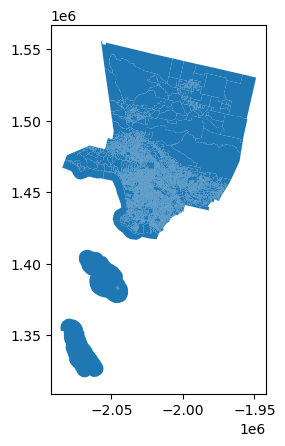

In [96]:
los_angeles_df.plot()

Okay, that looks about right, except we are including Catalina and San Clemente Islands...
Looking them up in the [California Census Map](https://web.archive.org/web/20250313162837/https://census.ca.gov/htc-map/) and the [LA County Census Tract Map](https://web.archive.org/web/20250320001704/https://www2.census.gov/geo/maps/DC2020/PL20/st06_ca/censustract_maps/c06037_los_angeles/DC20CT_C06037.pdf), we find that the two islands mostly correspond to Census Tract 5991, with the town of Avalon corresponding to Census Tract 5990. Let's remove them from the dataframe.

<Axes: >

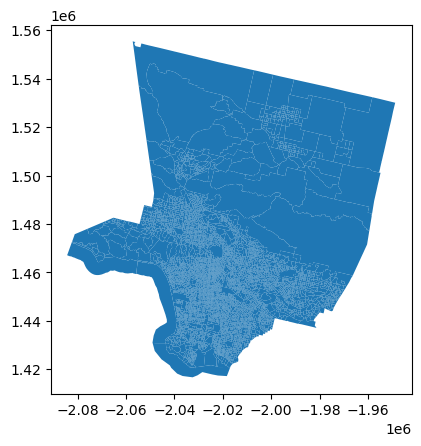

In [113]:
los_angeles_df = los_angeles_df[(los_angeles_df["TRACTCE"] != "599000") & (los_angeles_df["TRACTCE"] != "599100")]
los_angeles_df.plot()


Nice. Now we can test out some fancier visualizations.